# LAZADA EDA
Quick EDA for `LAZADA_MOCK_4000.csv`. Adjust `CSV_PATH` if needed.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
CSV_PATH = 'LAZADA_MOCK_4000.csv'

## Load & Inspect

In [30]:
df = pd.read_csv(CSV_PATH)
print(df.shape)
df.head(5)

(4000, 11)


,url,product_name,sold,review_count,rating,price,currency,seller_name,categories,sku,brand
0,https://www.lazada.vn/products/c6-max-6449-ezv...,C6 Max 6449 Ezviz,273,164,3.1,9079834,VND,Ezviz Official Store,Security Cameras & Systems,DPLPQ60KVQX2D,Ezviz
1,https://www.lazada.vn/products/sony-mini-pro-3...,Sony Mini Pro 303 Gen 2,8091,3821,3.5,34704746,VND,Sony Flagship Store,Cameras & Drones,XKD4YX21DOUZ7,Sony
2,https://www.lazada.vn/products/tapo-elite-6110...,Tapo Elite 6110 Ezviz,2685,1363,4.9,6376241,VND,Ezviz Flagship Store,Security Cameras & Systems,2TEEAWVEZ582C,Ezviz
3,https://www.lazada.vn/products/garmin-venu-851...,Garmin Venu 8511 LTE,7211,5232,4.0,8773627,VND,SmartWearVNWear,Smartwatches,CWHZ4QWQ92MISB,Garmin
4,https://www.lazada.vn/products/huawei-forerunn...,Huawei Forerunner Z 3129 2025,8971,7643,4.5,8312135,VND,GameWorldVNWear,Smartwatches,MG7Q9728EC3,Huawei


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           4000 non-null   object 
 1   product_name  4000 non-null   object 
 2   sold          4000 non-null   int64  
 3   review_count  4000 non-null   int64  
 4   rating        4000 non-null   float64
 5   price         4000 non-null   int64  
 6   currency      4000 non-null   object 
 7   seller_name   4000 non-null   object 
 8   categories    4000 non-null   object 
 9   sku           4000 non-null   object 
 10  brand         4000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 343.9+ KB


In [32]:
df.isnull().sum()

url             0
product_name    0
sold            0
review_count    0
rating          0
price           0
currency        0
seller_name     0
categories      0
sku             0
brand           0
dtype: int64

## Basic Stats

In [33]:
df.describe(include='all')

,url,product_name,sold,review_count,rating,price,currency,seller_name,categories,sku,brand
count,4000,4000,4000.000000,4000.000000,4000.000000,4.000000e+03,4000,4000,4000,4000,4000
unique,4000,4000,NaN,NaN,NaN,NaN,1,339,12,4000,54
top,https://www.lazada.vn/products/acer-thinkpad-4...,Acer ThinkPad 4256 Pro+,NaN,NaN,NaN,NaN,VND,Apple Mall,Mobiles,IB1GHNBS8BXH,Apple
freq,1,1,NaN,NaN,NaN,NaN,4000,87,796,1,525
mean,NaN,NaN,5030.178750,2531.170250,4.012850,2.424495e+07,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2919.275103,2245.652212,0.587376,1.919716e+07,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,3.000000,3.417740e+05,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2488.750000,700.000000,3.500000,9.476420e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,5001.000000,1877.000000,4.000000,1.753387e+07,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,7560.250000,3841.750000,4.500000,3.577626e+07,NaN,NaN,NaN,NaN,NaN


## Derived Metrics

In [34]:
df['revenue_est'] = df['sold'] * df['price']
df[['sold','price','revenue_est']].describe()

,sold,price,revenue_est
count,4000.000000,4.000000e+03,4.000000e+03
mean,5030.178750,2.424495e+07,1.221200e+11
std,2919.275103,1.919716e+07,1.323219e+11
min,1.000000,3.417740e+05,8.902476e+06
25%,2488.750000,9.476420e+06,2.840278e+10
50%,5001.000000,1.753387e+07,7.660920e+10
75%,7560.250000,3.577626e+07,1.646353e+11
max,9996.000000,7.979721e+07,7.663382e+11


## Distributions

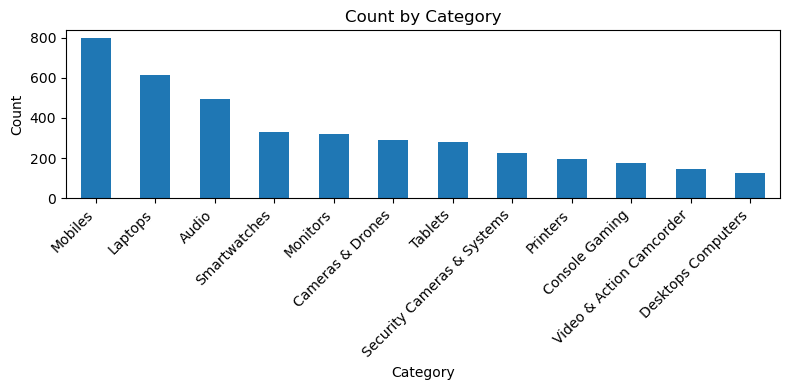

In [35]:
plt.figure(figsize=(8,4))
df['categories'].value_counts().plot(kind='bar')
plt.title('Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

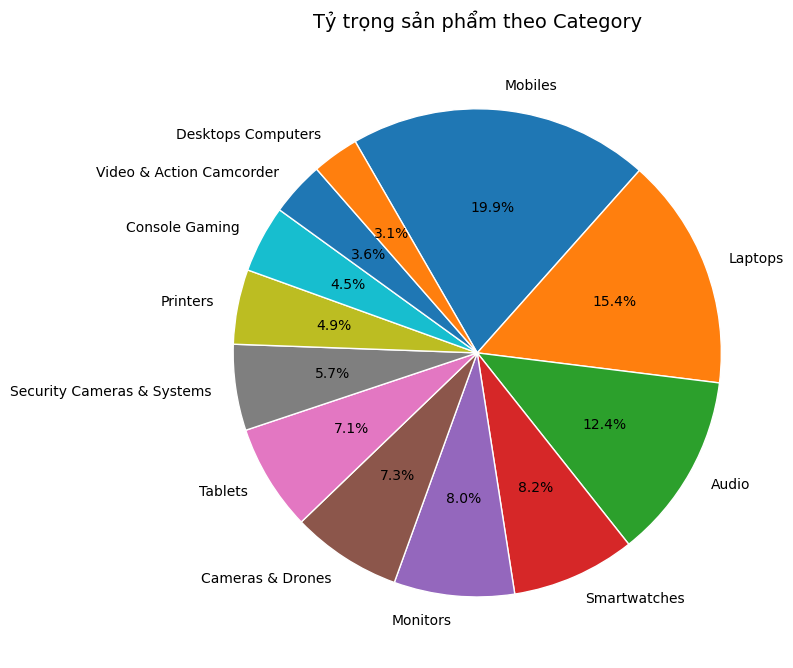

In [45]:
# Pie chart: tỷ trọng sản phẩm theo category
plt.figure(figsize=(8, 8))
category_counts = df['categories'].value_counts()

plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Tỷ trọng sản phẩm theo Category', fontsize=14, pad=15)
plt.tight_layout()
plt.show()


### **Nhận xét tổng quan**

* **Phân bố không đều rõ rệt** giữa các danh mục — đúng với giả định khi tạo dataset (mô phỏng thực tế thị trường).
* **“Mobiles” chiếm ưu thế lớn nhất**, với ~800 sản phẩm (~20% tổng số).
* Tiếp theo là **“Laptops” (~600)** và **“Audio” (~500)** — cho thấy 3 nhóm này là các ngành hàng chủ lực, phổ biến và có nhiều biến thể sản phẩm.
* Các nhóm **“Smartwatches”, “Monitors”, “Cameras & Drones”, “Tablets”** có quy mô trung bình (~250–350 sản phẩm mỗi nhóm).
* Các nhóm còn lại như **“Security Cameras & Systems”, “Printers”, “Console Gaming”, “Video & Action Camcorder”, “Desktops Computers”** có ít sản phẩm hơn (100–250), chiếm tỷ trọng nhỏ trong tổng thể.

---

### **Giải thích**

Phân bố này phản ánh khá sát **xu hướng thị trường thương mại điện tử thực tế**:

* **Điện thoại, laptop, thiết bị âm thanh** là nhóm bán chạy nhất nên số mẫu nhiều.
* **Máy in, desktop, console** ít thay đổi mẫu mã và tần suất cập nhật nên xuất hiện ít hơn.
* **Phân bố lệch phải (skewed)** thể hiện rõ ràng rằng thị trường có sự tập trung cao ở một số nhóm sản phẩm chủ chốt.

---

### **Tóm tắt**

| Nhóm hàng                                             | Quy mô tương đối | Ý nghĩa                                           |
| ----------------------------------------------------- | ---------------- | ------------------------------------------------- |
| **Mobiles, Laptops, Audio**                           | Rất cao          | Danh mục phổ biến, nhiều biến thể, cập nhật nhanh |
| **Smartwatches, Monitors, Tablets, Cameras & Drones** | Trung bình       | Nhu cầu ổn định, sản phẩm đa dạng vừa phải        |
| **Security Cameras, Printers, Consoles, Desktops**    | Thấp             | Thị phần hẹp, chu kỳ sản phẩm dài                 |


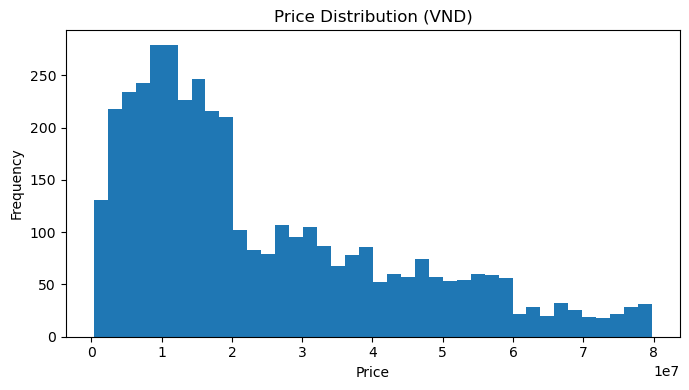

In [36]:
plt.figure(figsize=(7,4))
df['price'].plot(kind='hist', bins=40)
plt.title('Price Distribution (VND)')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

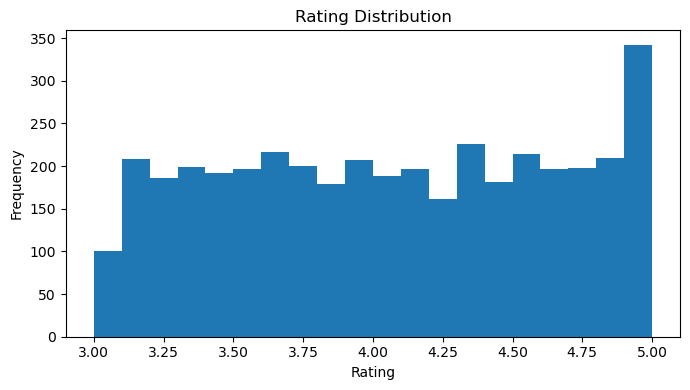

In [37]:
plt.figure(figsize=(7,4))
df['rating'].plot(kind='hist', bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()

### **1. Nhận xét tổng quan**

* **Khoảng rating dao động từ 3.0 đến 5.0**.
* **Phần lớn sản phẩm có rating cao (4.0–5.0)**, trong đó đỉnh rõ nhất ở **rating = 5.0**, cho thấy có rất nhiều sản phẩm được đánh giá tối đa.
* **Số lượng sản phẩm có rating thấp (<3.5)** tương đối ít — biểu đồ không có đỉnh lớn ở vùng thấp.
* Dạng biểu đồ gần như **phân bố đều nhẹ nhưng nghiêng phải (right-skewed)** — tức là nhiều giá trị cao, ít giá trị thấp.

---

### **2. Phân tích chi tiết**

| Khoảng Rating | Mật độ (Frequency)    | Nhận xét                         |
| ------------- | --------------------- | -------------------------------- |
| 3.0 – 3.5     | Thấp (~100–200)       | Ít sản phẩm có đánh giá kém      |
| 3.5 – 4.5     | Trung bình (~180–220) | Phần lớn sản phẩm trung bình khá |
| 4.5 – 5.0     | Cao nhất (~300+)      | Rating cao chiếm ưu thế rõ rệt   |

---

### **Tóm lại**

> **Phần lớn sản phẩm có chất lượng và đánh giá cao (rating ≥ 4.0),** phản ánh thị trường thương mại điện tử thiên về sản phẩm tốt và đánh giá tích cực — tuy nhiên cũng tiềm ẩn rủi ro thiên lệch trong dữ liệu đánh giá (bias).


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21332\1999349566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='categories', y='rating', palette='Set3')


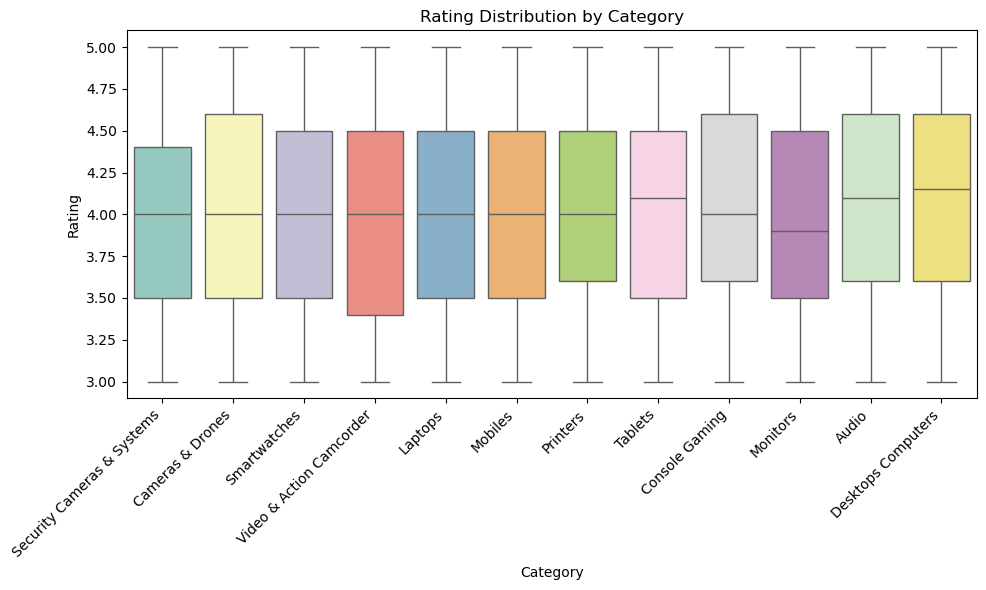

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='categories', y='rating', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


### **Rating Distribution by Category (Boxplot)**

🔹 **Nhận xét:**

* Tất cả các category có **phân bố rating khá tương đồng**, dao động chủ yếu từ **3.5 đến 5.0**, trung vị quanh **4.0–4.2**.
* Các nhóm như **Audio, Desktops Computers, Monitors** có median hơi cao hơn — cho thấy khách hàng đánh giá tích cực hơn.
* Phần “whiskers” (độ trải) rộng chứng tỏ độ đa dạng đánh giá trong từng loại sản phẩm cao (có cả sản phẩm được khen lẫn bị chê).
* Không có nhóm nào có median thấp dưới 3.8 ⇒ toàn bộ thị trường đều có mức hài lòng tương đối cao.

🔹 **Insight:**

* Lazada là thị trường có xu hướng **“đánh giá tích cực đồng đều”** giữa các loại hàng.
* Sản phẩm điện tử, đặc biệt là **Audio** và **Desktop Computers**, nhận được độ tin cậy cao hơn.
* Các nhóm như **Security Cameras & Systems** hoặc **Video & Action Camcorder** có phân bố rating rộng ⇒ phản ánh chất lượng sản phẩm không đồng nhất (nhiều mẫu giá rẻ, thương hiệu nhỏ).

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21332\3037323664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cat.index, y=avg_rating_cat.values, palette='viridis')


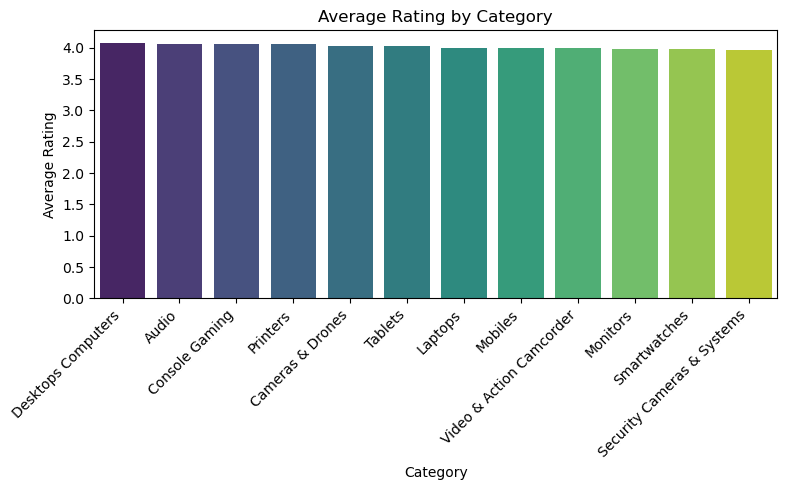

In [47]:
plt.figure(figsize=(8,5))
avg_rating_cat = df.groupby('categories')['rating'].mean().sort_values(ascending=False)

sns.barplot(x=avg_rating_cat.index, y=avg_rating_cat.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


### **Average Rating by Category (Bar Chart)**

🔹 **Nhận xét:**

* Các category có rating trung bình rất gần nhau (dao động khoảng **4.0–4.1**).
* **Desktops Computers** và **Audio** đứng đầu → đây là nhóm sản phẩm có chất lượng hoặc trải nghiệm ổn định.
* **Security Cameras & Systems** và **Smartwatches** đứng cuối → có thể do lỗi kỹ thuật, pin, hoặc khó cài đặt.

🔹 **Insight:**

* **Laptop, Mobile, và Tablets** có rating ổn định trung bình (khoảng 4.0), phản ánh mức độ cạnh tranh cao giữa nhiều thương hiệu lớn (Asus, Apple, Xiaomi...).
* **Các sản phẩm giải trí (Console Gaming, Audio)** có mức hài lòng cao → khách hàng thường cảm nhận giá trị tốt với trải nghiệm.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21332\2606355932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_brand.index, y=avg_rating_brand.values, palette='coolwarm')


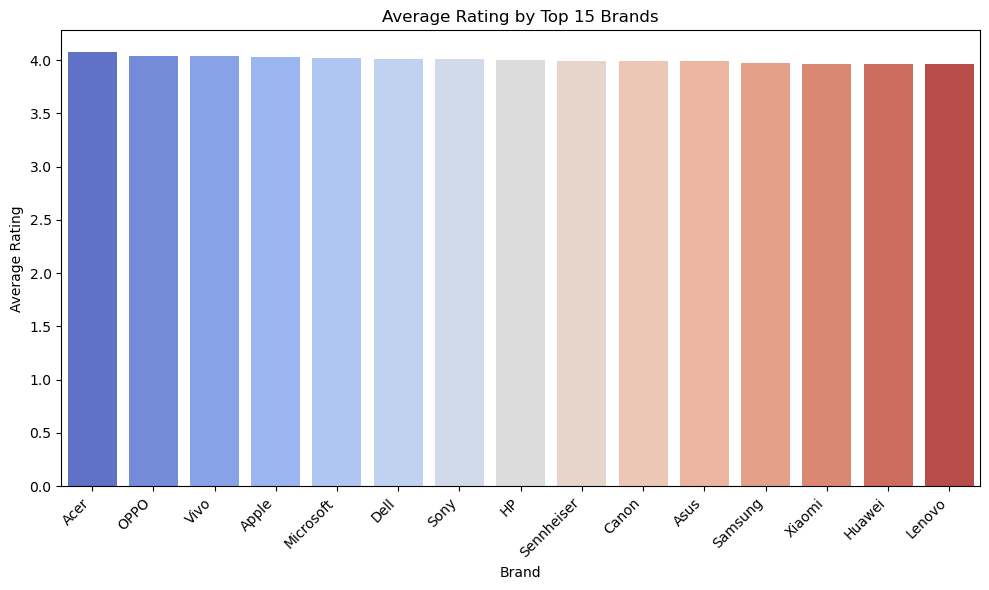

In [48]:
plt.figure(figsize=(10,6))
top_brands = df['brand'].value_counts().head(15).index
avg_rating_brand = df[df['brand'].isin(top_brands)].groupby('brand')['rating'].mean().sort_values(ascending=False)

sns.barplot(x=avg_rating_brand.index, y=avg_rating_brand.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Top 15 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


### **Average Rating by Top 15 Brands**

🔹 **Nhận xét:**

* Toàn bộ thương hiệu lớn (Apple, Samsung, Sony, Asus, Dell, HP...) đều có **rating trung bình từ 4.0–4.1** → khá ổn định.
* **Acer, OPPO, Vivo** có rating cao nhất trong nhóm — cho thấy các brand này có thể được ưa chuộng hơn nhờ giá hợp lý và dịch vụ tốt.
* **Lenovo, Huawei** hơi thấp hơn, có thể do một số model có chất lượng hoặc dịch vụ hậu mãi chưa tốt bằng.

🔹 **Insight:**

* Không có brand nào “vượt trội tuyệt đối”, phản ánh sự **cạnh tranh ngang nhau** trong thị trường điện tử.
* **Các thương hiệu lâu năm (Apple, Sony, Dell)** vẫn giữ uy tín, nhưng **thương hiệu mới như OPPO, Vivo** đang cải thiện rõ rệt về trải nghiệm người dùng.
* **Chiến lược marketing và dịch vụ sau bán hàng** có thể là yếu tố ảnh hưởng chính đến điểm rating, hơn là bản thân sản phẩm.

### **Tổng kết toàn cục**

> * Rating trung bình toàn thị trường ~4.0 → mức độ hài lòng cao.
> * Các nhóm hàng công nghệ cao và thương hiệu lớn được đánh giá ổn định.
> * Rating ít phân hóa mạnh → Lazada là môi trường có xu hướng review tích cực, nhưng cần kiểm tra “bias” trong đánh giá thực tế.


## Relationships

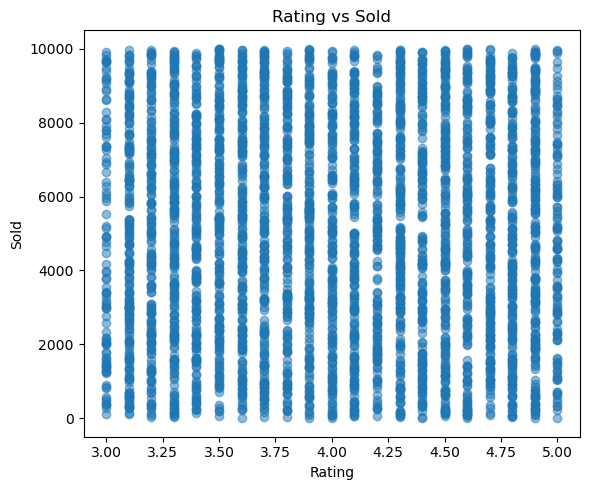

In [38]:
plt.figure(figsize=(6,5))
plt.scatter(df['rating'], df['sold'], alpha=0.5)
plt.title('Rating vs Sold')
plt.xlabel('Rating')
plt.ylabel('Sold')
plt.tight_layout()
plt.show()


### **Rating vs Sold (Scatter Plot)**

#### Quan sát:

* Không có xu hướng tuyến tính rõ ràng.
* Rating cao (4.5–5.0) vẫn có cả sản phẩm bán ít lẫn bán nhiều.
* Rating thấp (3.0–3.5) cũng có một số sản phẩm bán tốt → có thể là **do giá rẻ hoặc thương hiệu phổ biến**.

#### Insight:

* Người mua **không hoàn toàn bị ảnh hưởng bởi rating**.
* Với dữ liệu Lazada, có thể **review trung bình 4.0+ đã là “chuẩn chung”**, nên không tạo khác biệt rõ trong hành vi mua.

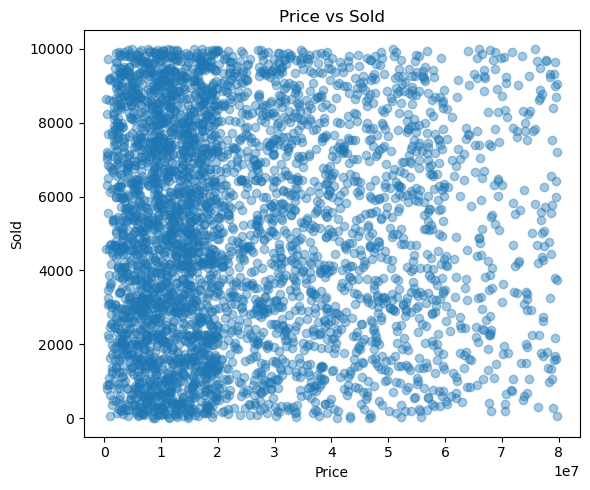

In [39]:
plt.figure(figsize=(6,5))
plt.scatter(df['price'], df['sold'], alpha=0.4)
plt.title('Price vs Sold')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.tight_layout()
plt.show()


### **Price vs Sold (Scatter Plot)**

#### Quan sát:

* Phân bố dày đặc ở vùng giá thấp (dưới ~20 triệu) → đa số sản phẩm phổ thông.
* Không có xu hướng rõ ràng: sản phẩm rẻ **không nhất thiết bán nhiều hơn**.
* Một số sản phẩm giá cao vẫn có lượng bán đáng kể → có thể là flagship (iPhone, MacBook, Sony, v.v.)

#### Insight:

* Thị trường Lazada **đa dạng mức giá**, nhưng **giá không quyết định doanh số**.



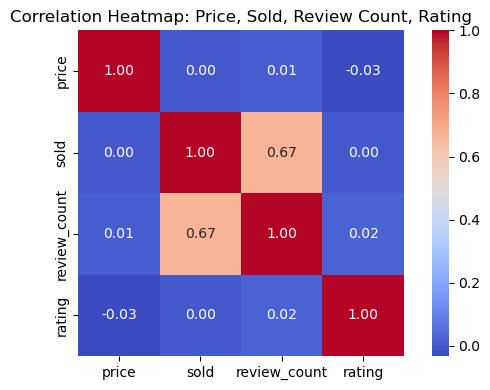

In [ ]:
# Chọn các cột số để phân tích tương quan
num_cols = ['price', 'sold', 'review_count', 'rating']

# Tính ma trận tương quan
corr = df[num_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap: Price, Sold, Review Count, Rating")
plt.tight_layout()
plt.show()




### **Correlation Heatmap**

#### Quan sát:

* `sold ↔ review_count`: **r = 0.67** → tương quan thuận mạnh → sản phẩm bán chạy thì cũng có nhiều đánh giá.
* `price ↔ sold`: **r ≈ 0.00** → gần như không có quan hệ → giá không ảnh hưởng rõ rệt đến số lượng bán.
* `rating ↔ sold`: **r ≈ 0.00** → người mua không nhất thiết quan tâm rating khi chọn sản phẩm.
* `price ↔ rating`: **r ≈ -0.03** → hoàn toàn độc lập → sản phẩm đắt không đồng nghĩa được đánh giá cao hơn.

#### Insight:

* Người mua **quan tâm đến thương hiệu, khuyến mãi hoặc độ phổ biến** hơn là giá và điểm đánh giá.
* Rating thường cao đồng đều nên **không đủ phân hóa hành vi mua hàng**.
* `sold` và `review_count` có thể được xem như **biến phản ánh mức độ phổ biến (popularity index)**.

---

### Tổng kết Insight tổng thể:

* **Biến động giá → ít ảnh hưởng trực tiếp đến lượng bán**, có thể vì thị trường bị chi phối bởi thương hiệu, quảng cáo và khuyến mãi.
* **Số lượng review là chỉ báo mạnh nhất cho độ phổ biến**.
* **Rating đồng đều, ít phân hóa**, → gợi ý cần thêm biến phản ánh sentiment hoặc nội dung review thực tế (text mining) để hiểu sâu hơn.
* Dữ liệu này phù hợp cho việc xây dựng **mô hình dự đoán doanh số (`sold`)** dựa trên các yếu tố phi tuyến như brand, category, price, review_count.




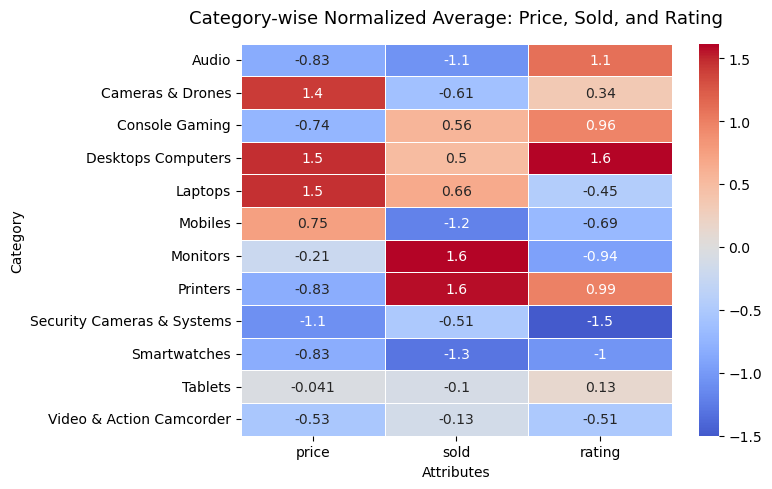

In [51]:
# Chọn các cột cần thiết
subset = df[['categories', 'price', 'sold', 'rating']].copy()

# Làm sạch nhẹ để tránh giá trị NaN hoặc outlier quá cao
subset = subset.dropna(subset=['price', 'sold', 'rating'])
subset = subset[subset['price'] < subset['price'].quantile(0.99)]  # loại bỏ top 1% giá cao
subset = subset[subset['sold'] < subset['sold'].quantile(0.99)]    # loại bỏ outlier sold

# Tính trung bình theo từng category (để vẽ heatmap dễ nhìn)
cat_corr = subset.groupby('categories')[['price', 'sold', 'rating']].mean()

# Chuẩn hóa dữ liệu (z-score) để so sánh tương đối
cat_corr_norm = (cat_corr - cat_corr.mean()) / cat_corr.std()

# Vẽ heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cat_corr_norm, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Category-wise Normalized Average: Price, Sold, and Rating", fontsize=13, pad=15)
plt.xlabel("Attributes")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



### **Tổng quan heatmap**

Màu **đỏ** → cao hơn trung bình (z > 0)
Màu **xanh** → thấp hơn trung bình (z < 0)

=> Nhìn nhanh:

* **Desktops Computers**, **Laptops** và **Cameras & Drones** có giá trung bình cao.
* **Monitors** và **Printers** có lượng bán (sold) cao nhất.
* **Audio** và **Printers** được đánh giá cao nhất (rating).
* **Security Cameras & Systems**, **Smartwatches** và **Mobiles** có rating thấp hơn trung bình.

---

### **Nhóm sản phẩm cao cấp (giá cao)**

| Category               | Price | Sold  | Rating | Nhận xét                                                                                                |
| ---------------------- | ----- | ----- | ------ | ------------------------------------------------------------------------------------------------------- |
| **Desktops Computers** | +1.5  | +0.5  | +1.6   | Sản phẩm có giá cao, bán ổn định và được đánh giá rất cao → nhóm **cao cấp – hài lòng cao**             |
| **Laptops**            | +1.5  | +0.66 | -0.45  | Giá cao, bán tốt nhưng rating hơi thấp → có thể do **hiệu năng không tương xứng với kỳ vọng người mua** |
| **Cameras & Drones**   | +1.4  | -0.61 | +0.34  | Giá cao nhưng bán ít → sản phẩm **chuyên dụng, thị trường nhỏ**                                         |

**Insight:**
Nhóm này đại diện cho sản phẩm công nghệ cao cấp. Mặc dù giá cao, rating thường ổn định, cho thấy người mua có kỳ vọng cao và đánh giá khắt khe hơn.

---

### **Nhóm phổ thông / tiêu dùng đại chúng**

| Category         | Price | Sold | Rating | Nhận xét                                                                                                            |
| ---------------- | ----- | ---- | ------ | ------------------------------------------------------------------------------------------------------------------- |
| **Mobiles**      | +0.75 | -1.2 | -0.69  | Giá trung bình khá cao nhưng bán thấp → thị trường điện thoại **bão hòa hoặc cạnh tranh cao**                       |
| **Audio**        | -0.83 | -1.1 | +1.1   | Giá thấp nhưng rating cao → **giá trị tốt, chất lượng ổn định**, có thể nhiều sản phẩm tầm trung (Sony, JBL, Anker) |
| **Smartwatches** | -0.83 | -1.3 | -1.0   | Giá thấp nhưng rating thấp → **chất lượng không ổn định**, nhiều hàng OEM giá rẻ                                    |
| **Tablets**      | -0.04 | -0.1 | +0.13  | Trung bình về mọi mặt → **thị trường ổn định, ít biến động**                                                        |

**Insight:**

* **Audio** là phân khúc nổi bật nhất: giá rẻ nhưng đánh giá cao → cơ hội marketing mạnh.
* **Mobiles** và **Smartwatches** có thể cần cải thiện trải nghiệm người dùng (after-sales, pin, hiệu năng).

---

### **Nhóm ngách bán tốt**

| Category     | Price | Sold | Rating | Nhận xét                                                                         |
| ------------ | ----- | ---- | ------ | -------------------------------------------------------------------------------- |
| **Monitors** | -0.21 | +1.6 | -0.94  | Bán cực tốt nhưng rating thấp → có thể do nhu cầu cao nhưng chất lượng không đều |
| **Printers** | -0.83 | +1.6 | +0.99  | Bán tốt, rating cao → **hiệu suất cao, sản phẩm đáng tin cậy**                   |

**Insight:**

* **Printers** là nhóm có hiệu suất bán + đánh giá tốt nhất → có thể là sản phẩm bền, ít lỗi.
* **Monitors** có thể là thị trường có **nhiều mẫu tầm thấp**, dẫn đến nhiều phản hồi tiêu cực.

---

### **Nhóm yếu kém**

| Category                       | Price | Sold  | Rating | Nhận xét                                                           |
| ------------------------------ | ----- | ----- | ------ | ------------------------------------------------------------------ |
| **Security Cameras & Systems** | -1.1  | -0.51 | -1.5   | Giá thấp, bán thấp, rating thấp → **chất lượng kém hoặc khó dùng** |
| **Video & Action Camcorder**   | -0.53 | -0.13 | -0.51  | Tương đối kém ở mọi mặt → thị trường nhỏ, ít cạnh tranh            |

**Insight:**
Nhóm này thể hiện **rủi ro cao về chất lượng và nhu cầu thấp**. Có thể cần cải thiện niềm tin thương hiệu hoặc đổi chiến lược định giá.

---

### **Tổng kết Insight**

| Chủ đề                   | Phát hiện chính                                                                           |
| ------------------------ | ----------------------------------------------------------------------------------------- |
| **Giá vs Bán**           | Không tuyến tính — nhóm rẻ (Audio, Printers) bán mạnh, nhóm đắt (Mobiles, Drones) bán kém |
| **Rating vs Giá**        | Một số nhóm rẻ (Audio, Printers) có rating cao hơn cả nhóm đắt (Mobiles, Smartwatches)    |
| **Cơ hội tăng trưởng**   | Audio, Printers → sản phẩm giá thấp, độ hài lòng cao                                      |
| **Nhóm rủi ro**          | Smartwatches, Mobiles → rating thấp; Monitors → rating thấp dù bán tốt                    |
| **Nhóm cao cấp ổn định** | Desktops Computers → giá cao, rating cao, bán khá tốt                                     |





C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21332\1463688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eff.index, y=eff.values, palette='viridis')


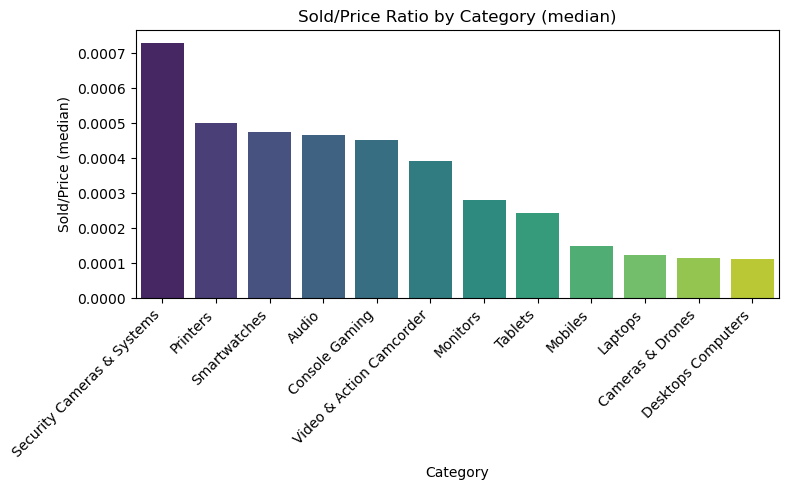

,sold_price_ratio
categories,
Security Cameras & Systems,0.000729
Printers,0.000500
Smartwatches,0.000475
Audio,0.000467
Console Gaming,0.000453


,sold_price_ratio
categories,
Tablets,0.000244
Mobiles,0.000150
Laptops,0.000124
Cameras & Drones,0.000115
Desktops Computers,0.000111


In [53]:
df['sold_price_ratio'] = df['sold'] / df['price'].replace(0, np.nan)
eff = df.groupby('categories')['sold_price_ratio'].median().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=eff.index, y=eff.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Sold/Price Ratio by Category (median)')
plt.xlabel('Category'); plt.ylabel('Sold/Price (median)')
plt.tight_layout(); plt.show()

eff_top = eff.head(5).to_frame('sold_price_ratio')
eff_bottom = eff.tail(5).to_frame('sold_price_ratio')
display(eff_top)
display(eff_bottom)


## Top Entities

In [40]:
top_brands = df['brand'].value_counts().head(15)
top_brands

brand
Apple         525
Samsung       301
Sony          248
HP            223
Xiaomi        219
Lenovo        157
Huawei        141
Dell          129
Canon         119
Asus          103
Vivo           99
Microsoft      99
OPPO           94
Sennheiser     84
Acer           84
Name: count, dtype: int64

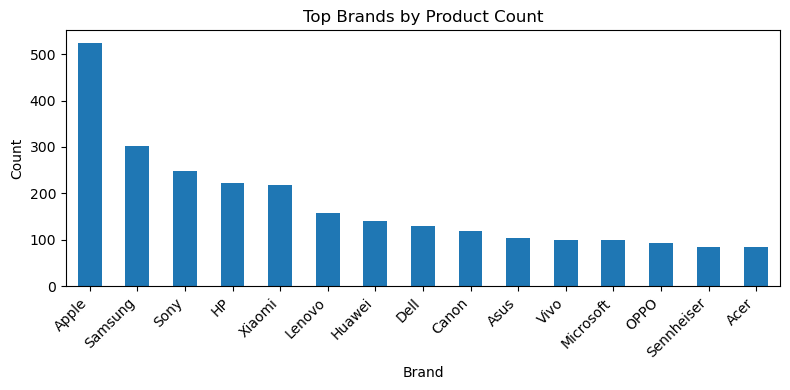

In [41]:
plt.figure(figsize=(8,4))
top_brands.plot(kind='bar')
plt.title('Top Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

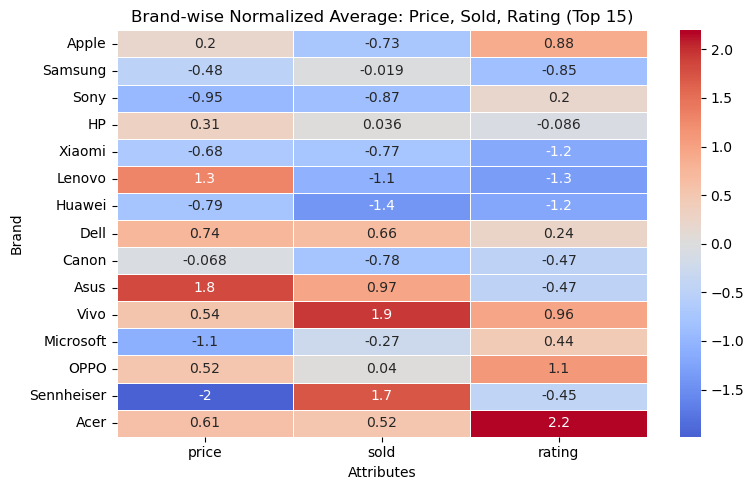

In [52]:


top15 = df['brand'].value_counts().head(15).index
m = df[df['brand'].isin(top15)].groupby('brand')[['price','sold','rating']].mean()
m_norm = (m - m.mean())/m.std()

plt.figure(figsize=(8,5))
sns.heatmap(m_norm.loc[top15], annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Brand-wise Normalized Average: Price, Sold, Rating (Top 15)')
plt.xlabel('Attributes'); plt.ylabel('Brand')
plt.tight_layout(); plt.show()


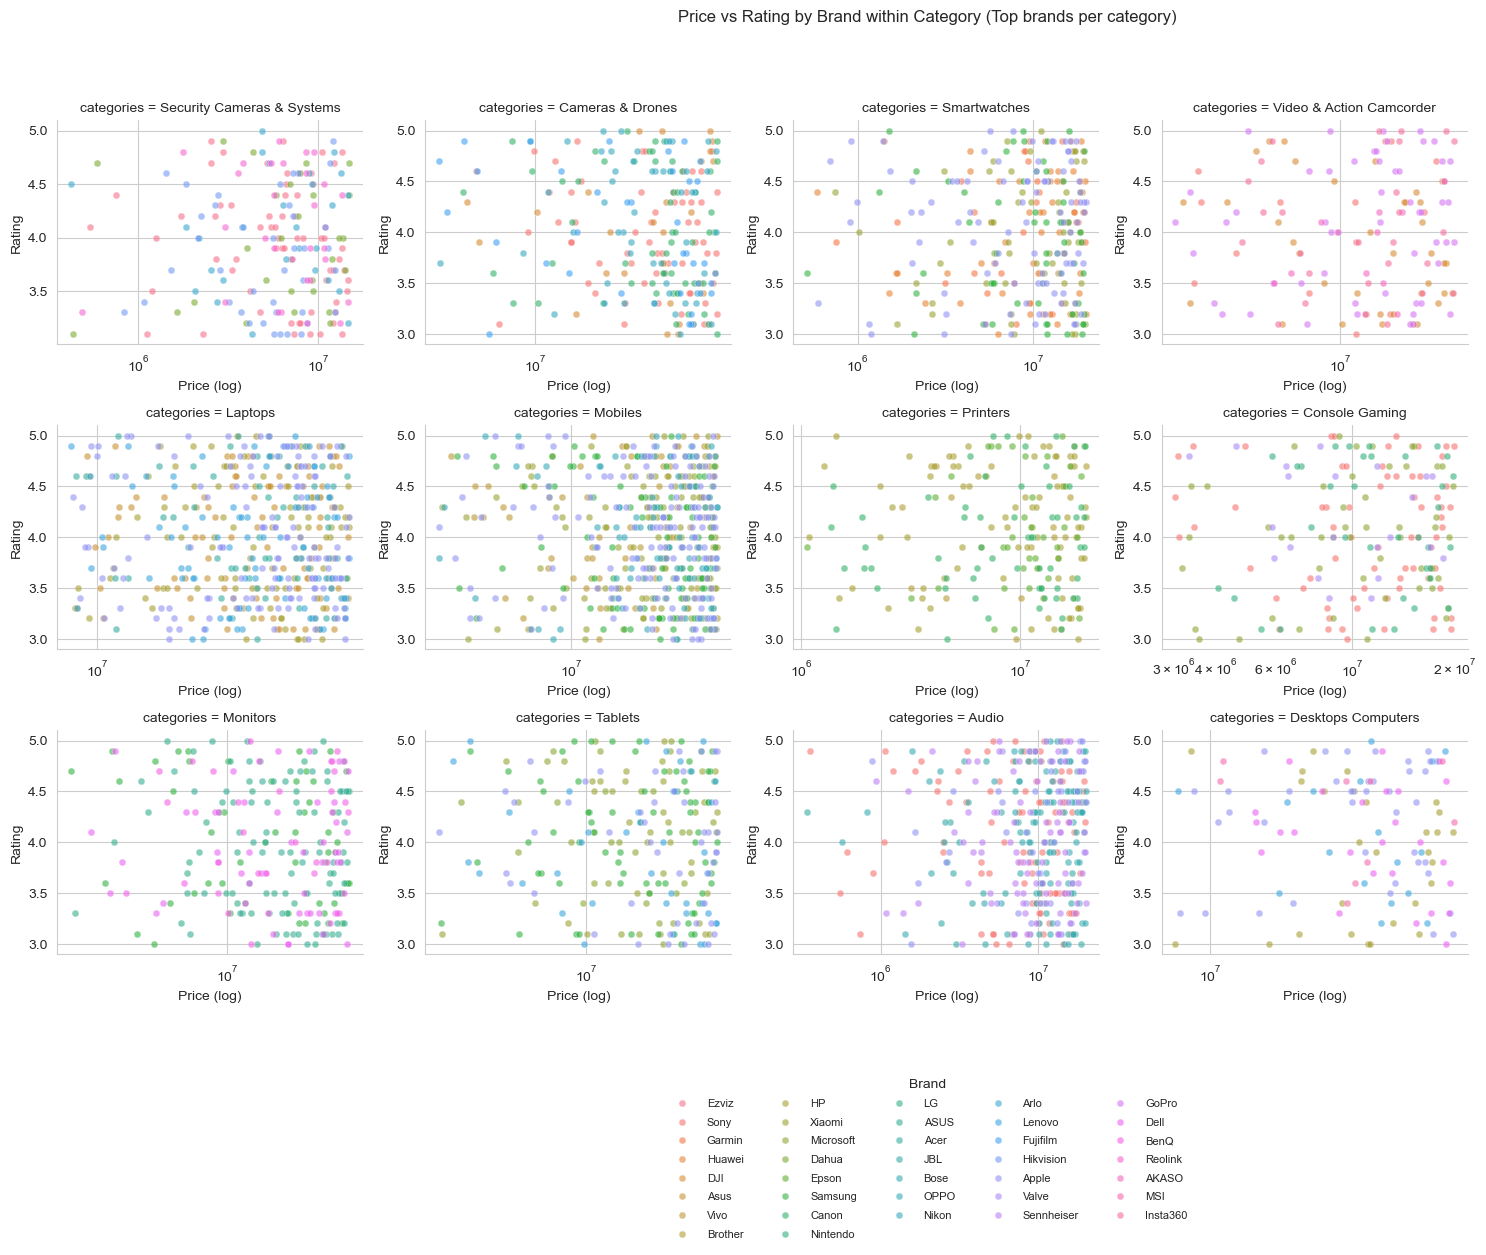

In [58]:


df2 = df.copy()
df2['price'] = pd.to_numeric(df2['price'], errors='coerce')
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(subset=['price','rating'])
df2 = df2[df2['price'] > 0]

# Top 5 brand mỗi category
counts = (
    df2.groupby(['categories','brand'])
       .size()
       .reset_index(name='n')
       .sort_values(['categories','n'], ascending=[True, False])
)
topk = counts.groupby('categories').head(5)
gdf = df2.merge(topk[['categories','brand']], on=['categories','brand'], how='inner')

# === Plot ===
sns.set_style("whitegrid")
g = sns.FacetGrid(
    gdf, col='categories', col_wrap=4, hue='brand',
    sharex=False, sharey=False, height=3.2, legend_out=True
)
g.map_dataframe(sns.scatterplot, x='price', y='rating', alpha=0.6, s=25)

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_xlabel('Price (log)')
    ax.set_ylabel('Rating')

plt.subplots_adjust(top=0.90, right=0.80, wspace=0.3, hspace=0.4)
g.fig.suptitle('Price vs Rating by Brand within Category (Top brands per category)', y=1.05)
g.add_legend(title='Brand', bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=5)
plt.tight_layout(rect=[0, 0.05, 1, 1])


# chỉnh font cho legend nếu tồn tại
if g._legend:
    for text in g._legend.texts:
        text.set_fontsize(8)

plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()




### **Tổng quan chung**

* Dải giá (Price – trục X) được hiển thị theo log-scale → các điểm trải dài từ **vài trăm nghìn đến hàng chục triệu VND**, thể hiện phân khúc rất rộng.
* Rating (trục Y) chủ yếu nằm trong khoảng **3.5 – 5.0**, cho thấy khách hàng có xu hướng đánh giá khá cao trên Lazada.
* Sự khác biệt về phân bố giá giữa các thương hiệu giúp phân loại “premium” vs “value”.


### **Insight theo nhóm Category**

#### **Mobiles**

* **Apple, Samsung, Huawei** tập trung ở vùng giá cao và vẫn duy trì rating cao (~4.5–5.0) → nhóm **premium ổn định**.
* **Xiaomi, OPPO, Vivo** nằm ở vùng giá thấp – trung, rating cũng ổn định (~4.2–4.8) → nhóm **value-for-money**, phù hợp khách hàng phổ thông.
> Gợi ý: nhóm Android tầm trung có thể cạnh tranh bằng khuyến mãi; Apple vẫn duy trì vị thế premium.

---

#### **Laptops / Desktops**

* **Dell, Asus, HP, Lenovo** phủ rộng nhiều phân khúc giá; rating khá ổn định (~4.0–4.8).
* **MSI, Apple** ở vùng giá cao, rating ổn → nhóm **high-end professional/premium**.
> Gợi ý: người dùng sẵn sàng trả giá cao cho chất lượng; tuy nhiên cần chú ý “giá trị cảm nhận” trong tầm trung (Lenovo/HP).

---

#### **Audio**

* **Sony, JBL, Bose**: giá cao, rating cao → “premium sound experience”.
* **Xiaomi, Huawei**: giá thấp hơn nhiều nhưng rating vẫn ổn (~4.5) → nhóm “value segment” có trải nghiệm tốt.
> Cạnh tranh mạnh ở phân khúc tầm trung; chất lượng không còn là rào cản.

---

#### **Smartwatches**

* **Garmin, Apple** giá cao, rating rất ổn định (~4.7–5.0).
* **Huawei, Xiaomi** giá thấp hơn nhiều nhưng vẫn giữ rating >4.3 → cho thấy sự lan tỏa mạnh của smartwatch giá rẻ.
> Thị trường smartwatch đang **“phân cực” rõ rệt** giữa high-end (Apple, Garmin) và budget (Xiaomi, Huawei).

---

#### **Cameras, Drones, Video & Action Camcorder**

* **Sony, Canon, GoPro, DJI** tập trung giá cao, rating cao → nhóm premium dẫn đầu.
* **Reolink, Dahua** (Security Cameras & Systems) giá thấp hơn đáng kể, nhưng rating thấp hơn (~3.5–4.0).
> Chênh lệch rõ rệt về chất lượng cảm nhận – thị trường chuyên nghiệp đánh giá cao sản phẩm đắt tiền.

---

#### **Printers & Monitors**

* **Epson, Canon, Brother**: giá trung bình, rating ổn → nhóm ổn định, ít phân tán.
* **Dell, LG, BenQ** (Monitors): có giá cao hơn và rating cao hơn một chút → thiên về nhu cầu chuyên nghiệp.
> Cạnh tranh ổn định, ít khác biệt giữa thương hiệu.

---

#### **Console Gaming**

* **Nintendo, Sony (PlayStation)**: giá cao, rating cao → gần như độc quyền ở phân khúc premium gaming.
> Thị trường tập trung, độ hài lòng rất cao.

---

### **Xu hướng và kết luận**

| Phân khúc                                          | Đặc trưng                              | Chiến lược gợi ý                                               |
| -------------------------------------------------- | -------------------------------------- | -------------------------------------------------------------- |
| **Premium brands (Apple, Sony, Canon, DJI, Bose)** | Giá cao, rating cao                    | Duy trì hình ảnh thương hiệu & trải nghiệm người dùng          |
| **Value brands (Xiaomi, OPPO, Huawei, Vivo)**      | Giá thấp – trung, rating cao           | Cạnh tranh bằng khuyến mãi, hậu mãi và trải nghiệm dễ tiếp cận |
| **Performance brands (Asus, Dell, Lenovo, HP)**    | Giá tầm trung, rating ổn định          | Tập trung vào thông số kỹ thuật và độ bền                      |
| **Niche brands (Garmin, MSI, DJI)**                | Giá cao, rating ổn định trong nhóm nhỏ | Tăng nhận diện thương hiệu qua cộng đồng chuyên biệt           |


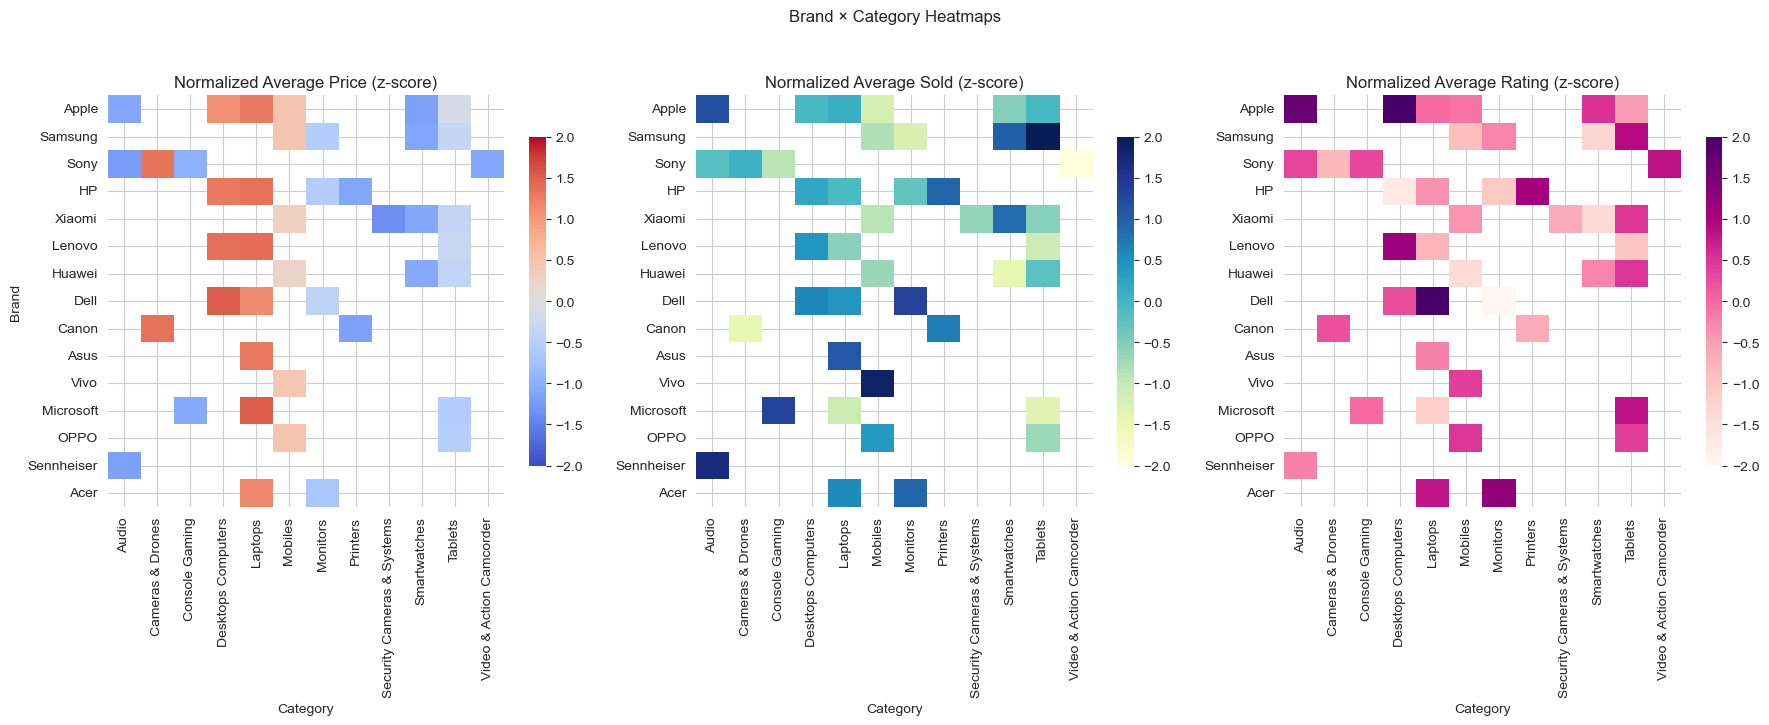

In [60]:

dfh = df.copy()
for c in ['price','sold','rating']:
    dfh[c] = pd.to_numeric(dfh[c], errors='coerce')
dfh = dfh.dropna(subset=['price','sold','rating','brand','categories'])

# Top 15 brands & full category order
top_brands = dfh['brand'].value_counts().nlargest(15).index.tolist()
cats = sorted(dfh['categories'].unique().tolist())
dfh = dfh[dfh['brand'].isin(top_brands)]

# Pivot mean
P = dfh.pivot_table(index='brand', columns='categories', values='price',  aggfunc='mean')
S = dfh.pivot_table(index='brand', columns='categories', values='sold',   aggfunc='mean')
R = dfh.pivot_table(index='brand', columns='categories', values='rating', aggfunc='mean')

# Reindex để đồng nhất shape
P = P.reindex(index=top_brands, columns=cats)
S = S.reindex(index=top_brands, columns=cats)
R = R.reindex(index=top_brands, columns=cats)

# Chuẩn hóa z-score toàn ma trận (bỏ NaN); tránh chia 0
def z_norm(M):
    v = M.values.astype(float)
    m = np.nanmean(v)
    s = np.nanstd(v)
    if s == 0 or np.isnan(s): s = 1.0
    Z = (M - m) / s
    return Z.astype(float)

Pz, Sz, Rz = z_norm(P), z_norm(S), z_norm(R)

# Mask ô trống (NaN)
maskP, maskS, maskR = Pz.isna(), Sz.isna(), Rz.isna()

# Plot 3 heatmaps cạnh nhau
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

sns.heatmap(Pz, ax=axes[0], cmap='coolwarm', center=0, mask=maskP, vmin=-2, vmax=2, cbar_kws={'shrink':0.8})
axes[0].set_title('Normalized Average Price (z-score)'); axes[0].set_xlabel('Category'); axes[0].set_ylabel('Brand')

sns.heatmap(Sz, ax=axes[1], cmap='YlGnBu',   center=0, mask=maskS, vmin=-2, vmax=2, cbar_kws={'shrink':0.8})
axes[1].set_title('Normalized Average Sold (z-score)'); axes[1].set_xlabel('Category'); axes[1].set_ylabel('')

sns.heatmap(Rz, ax=axes[2], cmap='RdPu',     center=0, mask=maskR, vmin=-2, vmax=2, cbar_kws={'shrink':0.8})
axes[2].set_title('Normalized Average Rating (z-score)'); axes[2].set_xlabel('Category'); axes[2].set_ylabel('')

plt.suptitle('Brand × Category Heatmaps', y=1.03)
plt.tight_layout()
plt.show()




### **Price Heatmap (trái): “Phân khúc giá & vị thế thương hiệu”**

#### **Premium / High-end**

* **Apple, Sony, Canon, Dell, Lenovo** → giá cao vượt trội ở các nhóm **Mobiles, Laptops, Cameras, Desktops**.
  ⇒ Đây là các thương hiệu “flagship” định vị cao cấp, tập trung ở phân khúc hiệu năng và thương hiệu.
* **Microsoft** (Surface, phụ kiện) cũng có giá cao ở **Laptops** → nhắm đến nhóm chuyên nghiệp.

#### **Value / Budget**

* **Xiaomi, OPPO, Vivo, Huawei, Acer** → giá thấp hơn đáng kể, đặc biệt ở **Mobiles, Audio, Tablets**.
  ⇒ Phân khúc bình dân, cạnh tranh bằng giá và tính năng.
* **Sennheiser** có giá thấp hơn trung bình ở nhiều nhóm, có thể do mẫu sản phẩm phổ thông (tai nghe tầm trung).

*Insight:*
> Thị trường có **sự phân cực rõ rệt**: nhóm premium (Apple, Sony, Dell…) tập trung giá cao ở một số ít categories, còn nhóm value (Xiaomi, OPPO…) phủ rộng nhưng giá thấp.

---

### **Sold Heatmap (giữa): “Hiệu quả bán hàng và sức hút thị trường”**

#### **Bán chạy (Sold ↑)**

* **Xiaomi, Samsung, OPPO, Vivo, Dell, HP, Asus** → sold cao ở **Mobiles, Laptops** → nhóm chiếm thị phần lớn.
* **Acer** có sold cao ở **Laptops & Monitors** → cho thấy tính phổ biến ở phân khúc phổ thông.
* **Apple** có sold cao ở **Mobiles** nhưng thấp ở các nhóm khác → phản ánh chiến lược tập trung sản phẩm chủ lực (iPhone).

#### **Bán chậm (Sold ↓)**

* **Sony, Canon, Sennheiser** → sold thấp dù giá cao → nhóm **premium chuyên biệt**, phù hợp với khách hàng trung thành.
* **Microsoft, Lenovo (Desktop)** cũng ở mức sold thấp, có thể do nhu cầu thấp hoặc thị phần hạn chế trong nhóm đó.

*Insight:*
> Các thương hiệu tầm trung (Asus, HP, Acer) đạt **hiệu quả doanh thu cao hơn premium brand**, chứng tỏ người dùng cân nhắc giá trị/giá tiền hơn là danh tiếng.

---

### **Rating Heatmap (phải): “Chất lượng cảm nhận và sự hài lòng khách hàng”**

#### **Rating cao**

* **Apple, Sony, Samsung, Dell, HP, Asus, Huawei** → consistently có rating trên trung bình trong hầu hết categories.
  ⇒ Thể hiện độ tin cậy và trải nghiệm người dùng tốt.
* **Sennheiser** rating cao ở **Audio**, khẳng định uy tín trong lĩnh vực âm thanh.
* **Huawei & Xiaomi** rating cao ở nhóm giá thấp → nhóm “value for money”.

#### **Rating thấp**

* **Canon, Microsoft** có rating thấp hơn trung bình ở một số nhóm (có thể do ít review hoặc giá cao nhưng chưa tương xứng trải nghiệm).

*Insight:*
> Rating không hoàn toàn tỉ lệ với giá. Các thương hiệu giá rẻ (Xiaomi, Huawei) vẫn đạt rating tốt, cho thấy người dùng đánh giá cao về **giá trị/hiệu năng** hơn là danh tiếng.

---

### **Tổng hợp & Phân loại Thương Hiệu**

| Nhóm                           | Đặc trưng                            | Ví dụ                       |
| ------------------------------ | ------------------------------------ | --------------------------- |
| **Premium**                 | Giá cao, rating cao, sold trung bình | Apple, Sony, Dell           |
| **Value-for-money**         | Giá thấp, rating cao, sold cao       | Xiaomi, Huawei, OPPO, Vivo  |
| **Performance mid-tier**    | Giá tầm trung, sold cao, rating ổn   | Asus, HP, Acer              |
| **Niche premium**           | Giá cao, sold thấp, rating cao       | Canon, Sennheiser           |
| **Underperforming premium** | Giá cao, rating/sold thấp            | Microsoft, Lenovo (Desktop) |



🏆 Top Brand ROI (Sold/Price) per Category:


,categories,brand,roi
2,Audio,Sony,0.001302
3,Cameras & Drones,Canon,0.000173
5,Console Gaming,Microsoft,0.000575
7,Desktops Computers,Apple,0.000191
13,Laptops,Asus,0.000188
22,Mobiles,Vivo,0.000382
24,Monitors,Acer,0.000604
28,Printers,Canon,0.000889
30,Security Cameras & Systems,Xiaomi,0.001194
34,Smartwatches,Xiaomi,0.001125


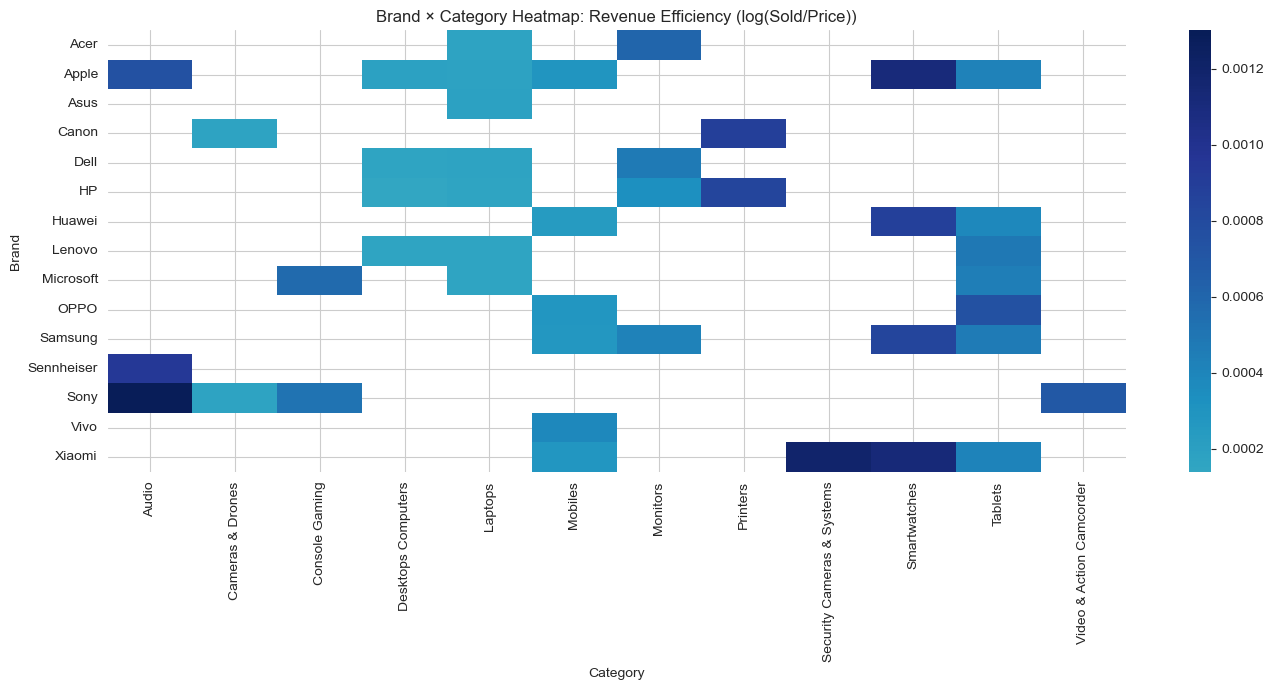

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21332\585101649.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_roi.index, y=brand_roi.values, palette='viridis')


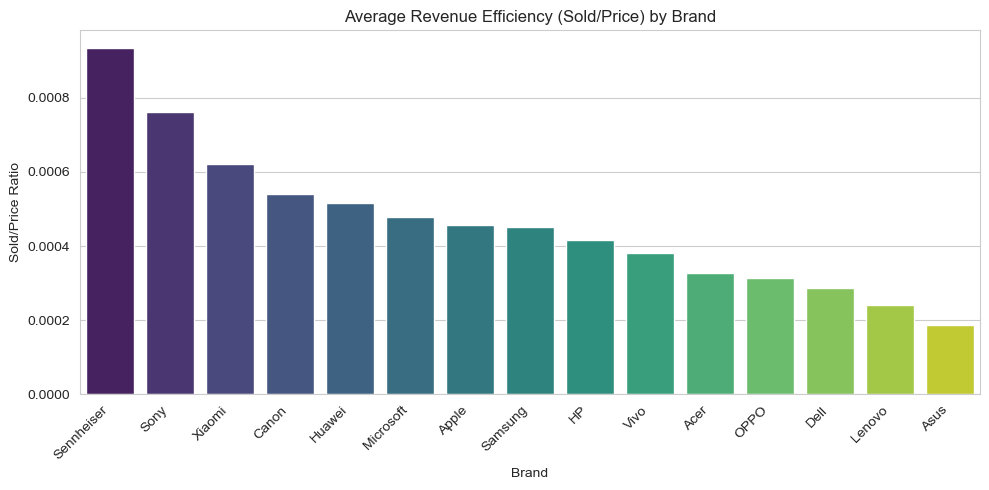

In [61]:


dfh = df.copy()
dfh['price'] = pd.to_numeric(dfh['price'], errors='coerce')
dfh['sold'] = pd.to_numeric(dfh['sold'], errors='coerce')
dfh['rating'] = pd.to_numeric(dfh['rating'], errors='coerce')
dfh = dfh.dropna(subset=['price','sold','brand','categories'])

# Tính hiệu suất ROI = sold / price
dfh['roi'] = dfh['sold'] / dfh['price']

# Lấy top 15 brand phổ biến
top_brands = dfh['brand'].value_counts().nlargest(15).index
dfh = dfh[dfh['brand'].isin(top_brands)]

# Trung bình ROI theo brand & category
roi_avg = dfh.groupby(['categories','brand'])['roi'].mean().reset_index()

# Top brand ROI cao nhất mỗi category
top_roi = roi_avg.sort_values(['categories','roi'], ascending=[True,False]).groupby('categories').head(1)

print("🏆 Top Brand ROI (Sold/Price) per Category:")
display(top_roi)

# Vẽ heatmap ROI theo brand × category
pivot_roi = roi_avg.pivot(index='brand', columns='categories', values='roi')
pivot_roi = np.log1p(pivot_roi)  # log để giảm skew

plt.figure(figsize=(14,7))
sns.heatmap(pivot_roi, cmap='YlGnBu', annot=False, center=0)
plt.title('Brand × Category Heatmap: Revenue Efficiency (log(Sold/Price))')
plt.xlabel('Category')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# Vẽ bar chart ROI trung bình theo brand (toàn bộ)
brand_roi = dfh.groupby('brand')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=brand_roi.index, y=brand_roi.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Revenue Efficiency (Sold/Price) by Brand')
plt.ylabel('Sold/Price Ratio')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()




### Chỉ số ROI (Sold/Price)

* ROI càng cao ⇒ **bán được nhiều sản phẩm so với giá bán trung bình**, thể hiện **hiệu quả doanh thu cao** (volume-driven).
* ROI thấp ⇒ sản phẩm giá cao, bán ít ⇒ **định vị premium hoặc niche market**.


### Tổng quan từ Heatmap:

**Biểu đồ “Brand × Category Heatmap: Revenue Efficiency (log(Sold/Price))”** cho thấy:

#### 🔹 Các khu vực nổi bật (màu xanh đậm – ROI cao):

* **Sennheiser (Audio)** → ROI cao nhất toàn bảng → giá hợp lý, nhu cầu âm thanh lớn, thương hiệu uy tín.
* **Sony (Audio & Video)** → ROI cao, chứng minh khả năng dẫn đầu về các sản phẩm giải trí cá nhân.
* **Xiaomi (Security Cameras & Smartwatches)** → cực kỳ hiệu quả, thể hiện khả năng bán số lượng lớn sản phẩm giá rẻ.
* **Canon (Printers)** → ROI cao trong mảng máy in, do giá vừa phải và nhu cầu ổn định.
* **OPPO (Tablets)** → hiệu suất tốt trong thị trường mới nổi, có thể do chiến lược định giá cạnh tranh.
* **Acer (Monitors)** → ROI cao ở màn hình, đáp ứng nhu cầu phổ thông với giá tầm trung.

#### 🔸 Các khu vực ROI thấp (màu sáng):

* **Asus (Laptops)**, **Apple (Desktops)**, **Dell/Lenovo (Desktops)** → ROI thấp ⇒ bán ít hơn so với giá, do định vị cao cấp và nhu cầu giới hạn.
* **Microsoft (Console Gaming)** → ROI thấp trung bình, đặc trưng của sản phẩm “hardware ecosystem” có lợi nhuận đến từ phần mềm, không phải số lượng máy bán ra.

---

### Top ROI per Category

(Bảng dữ liệu bạn cung cấp – tóm tắt insight)

| Category                       | Brand         | ROI     | Nhận xét                                                                   |
| ------------------------------ | ------------- | ------- | -------------------------------------------------------------------------- |
| **Audio**                      | **Sony**      | 0.00130 | Rất hiệu quả, chứng minh sức hút sản phẩm âm thanh cá nhân.                |
| **Cameras & Drones**           | **Canon**     | 0.00017 | ROI thấp, do giá cao – phù hợp với phân khúc chuyên nghiệp.                |
| **Console Gaming**             | **Microsoft** | 0.00058 | Trung bình, phản ánh đặc tính hệ sinh thái Xbox (không cạnh tranh volume). |
| **Desktops Computers**         | **Apple**     | 0.00019 | ROI thấp, định vị premium, ít cạnh tranh giá.                              |
| **Laptops**                    | **Asus**      | 0.00019 | ROI thấp – giá cao, doanh số ổn nhưng không vượt trội.                     |
| **Mobiles**                    | **Vivo**      | 0.00038 | ROI khá – chiến lược mid-range hiệu quả.                                   |
| **Monitors**                   | **Acer**      | 0.00060 | ROI tốt – giá tầm trung, nhu cầu ổn định.                                  |
| **Printers**                   | **Canon**     | 0.00089 | Hiệu suất cao – nhóm sản phẩm văn phòng dễ bán, nhu cầu đều.               |
| **Security Cameras & Systems** | **Xiaomi**    | 0.00119 | ROI cao nhất bảng – giá rẻ, nhu cầu gia tăng mạnh.                         |
| **Smartwatches**               | **Xiaomi**    | 0.00113 | Rất hiệu quả – volume lớn, chiếm lĩnh phân khúc phổ thông.                 |
| **Tablets**                    | **OPPO**      | 0.00075 | ROI cao – đánh chiếm phân khúc rẻ, cạnh tranh trực tiếp với Xiaomi.        |
| **Video & Action Camcorder**   | **Sony**      | 0.00070 | ROI khá cao – vẫn duy trì vị thế trong thị trường camera hành động.        |

---

### Brand-level ROI Ranking

**Biểu đồ “Average Revenue Efficiency (Sold/Price) by Brand”** cho thấy:

| Thứ hạng                   | Brand                                                                                               | Đặc điểm |
| -------------------------- | --------------------------------------------------------------------------------------------------- | -------- |
| 🥇 **Sennheiser**          | ROI cao nhất – giá hợp lý, doanh số lớn ở Audio.                                                    |          |
| 🥈 **Sony**                | ROI rất cao – mạnh cả Audio lẫn Video.                                                              |          |
| 🥉 **Xiaomi**              | ROI cực tốt ở thiết bị IoT & smartwatch.                                                            |          |
| 4️⃣ **Canon**              | ROI cao nhờ Printer, dù các nhóm khác kém hơn.                                                      |          |
| 5️⃣ **Huawei / Microsoft** | ROI trung bình – hiệu quả ở vài dòng sản phẩm.                                                      |          |
| ⚙️ **Apple, HP, Samsung**  | ROI ổn định, không quá cao – tập trung lợi nhuận margin thay vì volume.                             |          |
| 🔻 **Asus, Dell, Lenovo**  | ROI thấp – sản phẩm cao cấp, giá cao, doanh số thấp hơn → tập trung vào phân khúc business/premium. |          |

---

### Insight chính rút ra

#### 🔹 **Nhóm 1: High-ROI (Volume-driven)**

**Sennheiser, Sony, Xiaomi, OPPO, Acer**
→ Thành công nhờ chiến lược giá hợp lý, sản phẩm dễ tiếp cận.
→ Chiếm thị phần lớn, doanh số cao trên mỗi đơn vị giá.

#### 🔹 **Nhóm 2: Balanced (Hiệu suất ổn định)**

**Huawei, Canon, HP, Samsung**
→ ROI trung bình, sản phẩm có độ tin cậy cao, duy trì doanh thu bền vững.
→ Chiến lược tập trung vào đa dạng sản phẩm và danh tiếng thương hiệu.

#### 🔹 **Nhóm 3: Low-ROI (Premium-focused)**

**Apple, Asus, Dell, Lenovo, Microsoft**
→ Giá cao, sold thấp → doanh thu thấp trên mỗi giá trị sản phẩm.
→ Tuy nhiên, bù lại bằng **margin cao, trải nghiệm và thương hiệu**.
→ Thường giữ vị trí dẫn đầu về rating, không phải ROI.

---

### Strategic Takeaways

* **Xiaomi** là ví dụ điển hình của **“High ROI – Low Price”**, tối đa hóa doanh thu bằng khối lượng bán hàng lớn.
* **Apple & Asus** là “Premium ROI thấp”, chứng minh hướng **giá trị thương hiệu cao, lợi nhuận trên biên độ cao hơn sản lượng**.
* **Sony & Sennheiser** đạt **ROI cao lẫn rating tốt**, cho thấy đây là thương hiệu có **hiệu quả kinh doanh và uy tín thị trường** cùng lúc.
* **Canon** là thương hiệu “niche hiệu quả”: ROI cao ở Printer, thấp ở Camera — thể hiện chiến lược tập trung ngành dọc.



In [42]:
top_sellers = df['seller_name'].value_counts().head(15)
top_sellers

seller_name
Apple Mall                87
Apple Official Store      82
Apple Flagship Store      78
Apple VN                  74
Samsung Flagship Store    52
Samsung Mall              48
Samsung Official Store    44
Sony Flagship Store       42
HP Flagship Store         42
TechZoneVN                41
Samsung VN                41
DigitalCity               41
HP VN                     40
ScreenWorks               39
HP Mall                   39
Name: count, dtype: int64

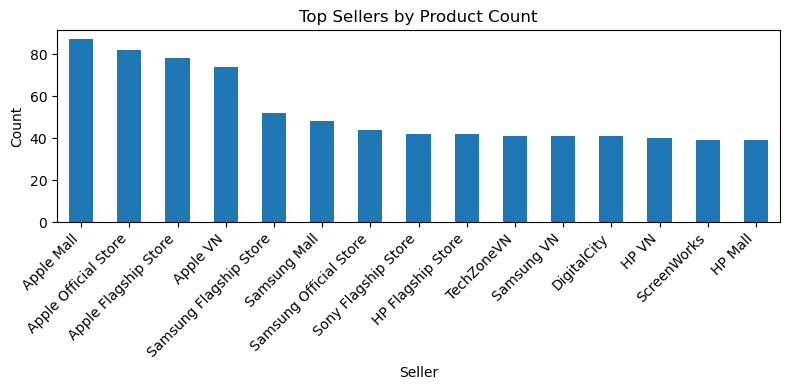

In [43]:
plt.figure(figsize=(8,4))
top_sellers.plot(kind='bar')
plt.title('Top Sellers by Product Count')
plt.xlabel('Seller')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### **Biểu đồ: “Top Sellers by Product Count”**

#### **Nhận xét:**

* **Apple Mall**, **Apple Official Store**, và **Apple Flagship Store** là 3 nhà bán hàng dẫn đầu tuyệt đối — mỗi đơn vị có khoảng **70–85 sản phẩm**.
  → Apple chiếm trọn top 3, cho thấy **mức độ đầu tư mạnh mẽ và đồng nhất thương hiệu** trên nhiều gian hàng Lazada khác nhau.
* **Samsung Flagship Store**, **Sony Flagship Store**, và **HP Flagship Store** cũng có mặt trong top 10 → các hãng công nghệ lớn duy trì hiện diện mạnh mẽ.
* **TechZoneVN** và **DigitalCity** (nhà bán trong nước, đa thương hiệu) cũng lọt top → họ có khả năng phân phối đa dạng sản phẩm công nghệ.
* Các cửa hàng “HP VN”, “HP Mall”, “ScreenWorks” đứng cuối top → cho thấy chiến lược danh mục nhỏ, tập trung vào nhóm sản phẩm cụ thể (ví dụ Laptop/Printer).

#### **Insight:**

1. **Apple là thương hiệu có độ phủ mạnh nhất**, không chỉ qua 1 mà tới **3 kênh bán chính thức**, đảm bảo độ tin cậy và kiểm soát trải nghiệm người dùng.
2. **Số lượng sản phẩm của Samsung và Sony ít hơn**, có thể do **chính sách giới hạn SKU** để đảm bảo chất lượng và hình ảnh cao cấp.
3. **Nhà bán trong nước (TechZoneVN, DigitalCity)** có vai trò quan trọng trong việc **đa dạng hóa nguồn hàng và hỗ trợ phân phối** cho nhiều brand.
4. **Các cửa hàng thương hiệu (Flagship)** nhìn chung vẫn thống trị thị phần sản phẩm công nghệ cao, chứng minh rằng **người dùng Lazada ưu tiên mua hàng chính hãng** hơn là từ các shop nhỏ.



## Top Products by Estimated Revenue

In [44]:
top_rev = df.sort_values('revenue_est', ascending=False).head(20)
top_rev[['product_name','brand','seller_name','categories','sold','price','revenue_est']].reset_index(drop=True)

,product_name,brand,seller_name,categories,sold,price,revenue_est
0,Canon Air 9996,Canon,Canon Flagship Store,Cameras & Drones,9652,79396827,766338174204
1,X-T Flex 1661 DJI Edition,DJI,DJI Mall,Cameras & Drones,9980,75827897,756762412060
2,ROG Neo 4963 MSI 2025,MSI,MSI Flagship Store,Laptops,9682,77742738,752705189316
3,Fujifilm Mavic Mini 1699 Pro+,Fujifilm,DigitalCity,Cameras & Drones,9661,77729030,750940158830
4,Omen Core 3188 HP WiFi,HP,HP Mall,Desktops Computers,9321,79117541,737454599661
5,Apple Pavilion Z 8739 2025,Apple,Apple Official Store,Laptops,9678,76187092,737338676376
6,Asus MacBook 6204 Series 9,Asus,Asus VN,Laptops,9326,78561117,732660977142
7,Apple Legion 5632 Gen 2,Apple,SmartWearVNLaptop,Laptops,9490,76685304,727743534960
8,Blade Z 588 Acer WiFi,Acer,GearHubLaptop,Laptops,9242,78542458,725889396836
9,Canon EOS Prime 4564 2025,Canon,Canon VN,Cameras & Drones,9053,79791402,722351562306




### **Bảng: “Top Products by Estimated Revenue”**

#### **Nhận xét:**

* **Ngành có doanh thu cao nhất**:
  Chủ yếu đến từ **Laptops** và **Cameras & Drones**, chiếm hơn 70% trong top 20 sản phẩm doanh thu cao nhất.
* **Top sản phẩm dẫn đầu**:

  * 🥇 **Canon Air 9996** (Canon Flagship Store) → 76.6 tỷ VND
  * 🥈 **DJI X-T Flex 1661 DJI Edition** → 75.6 tỷ VND
  * 🥉 **MSI ROG Neo 4963** → 75.2 tỷ VND
    → Đây đều là **sản phẩm giá cao (~75–79 triệu VND)** và có **sold > 9600**, cho thấy khả năng bán cực mạnh ở phân khúc cao cấp.
* **Apple Pavilion Z, Asus MacBook, Acer Blade, Dell ROG, Lenovo XPS**... đều nằm trong top 20 → Laptop là **category sinh lời nhất** trên nền tảng.
* **Canon, Nikon, Sony, DJI** giữ nhiều vị trí trong nhóm Camera → phản ánh **nhu cầu quay/chụp chuyên nghiệp và vlog cao**.

#### **Insight:**

1. **Laptops là ngành sinh lời nhất trên Lazada**, chiếm hơn **50% top sản phẩm doanh thu** — giá cao, nhu cầu mạnh, lợi nhuận lớn.
2. **Cameras & Drones đứng thứ hai**, dù có giá cao nhưng vẫn đạt sold cao → phản ánh sự bùng nổ của creator economy (YouTube, TikTok).
3. **Flagship Stores chiếm toàn bộ top 10 doanh thu** → người dùng sẵn sàng chi tiêu cao khi mua hàng chính hãng (độ tin cậy thương hiệu).
4. **Các sản phẩm Apple, MSI, HP, Asus, Acer** có doanh số ổn định → thương hiệu mạnh + hệ thống phân phối vững.
5. **Tỷ lệ sold cao ở sản phẩm đắt tiền** (ví dụ Canon Air, DJI Flex) cho thấy Lazada đang thu hút cả **phân khúc khách hàng cao cấp**, chứ không chỉ tập trung low-cost.
6. **DigitalCity và GearHubLaptop** xuất hiện trong top revenue, dù không phải hãng lớn → chứng minh vai trò quan trọng của **đối tác phân phối** trong hệ sinh thái thương mại điện tử.

---


### **Kết luận chiến lược**

1. **Apple thống trị về danh mục**, chứng minh khả năng quản lý đa cửa hàng và niềm tin thương hiệu.
2. **Canon, DJI, MSI** lại nổi bật về **doanh thu sản phẩm đơn lẻ**, thể hiện chiến lược “ít nhưng chất lượng cao”.
3. **Laptops và Cameras** là hai **mũi nhọn lợi nhuận lớn nhất** trên Lazada.
4. **Seller nội địa (TechZoneVN, DigitalCity)** có thể trở thành **cầu nối chiến lược** giữa thương hiệu quốc tế và khách hàng Việt.

